In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
data_import = pd.read_csv('/Users/sitanshurupani/Data Science Coursework/Sem 4/GQP - National Parks/DataSpell Project/Data/Daily_attendance.csv')

In [3]:
test_df = data_import[['Full_Date','value']]
test_df['Full_Date'] = pd.to_datetime(test_df['Full_Date'])
test_df = test_df[test_df['Full_Date'].dt.year == 2021]

/var/folders/90/98s1yvbs2zq9h146qcbc3t_h0000gn/T/ipykernel_74999/1187279028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Full_Date'] = pd.to_datetime(test_df['Full_Date'])


In [6]:
test_df.rename(columns={'Full_Date':'ds', 'value':'y'}, inplace=True)

In [7]:
test_df.head()

,ds,y
276,2021-05-01,743.0
277,2021-05-02,621.0
278,2021-05-03,339.0
279,2021-05-04,366.0
280,2021-05-05,186.0


In [8]:
m = Prophet()
m.fit(test_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.39391


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      63       318.885    0.00171752       84.2303   2.078e-05       0.001      114  LS failed, Hessian reset 
      99       319.016   1.30183e-06       75.1016           1           1      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       319.028   8.65712e-05       80.7135   1.155e-06       0.001      231  LS failed, Hessian reset 
     157       319.034   3.65184e-07        81.758    4.68e-09       0.001      333  LS failed, Hessian reset 
     165       319.034   6.18152e-09       72.0895      0.2595      0.2595      345   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [52]:
future = m.make_future_dataframe(periods=365)
future.tail()
future = future[(future['ds'].dt.month < 11) & (future['ds'].dt.month > 4)]

In [53]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
363,2022-10-27,1160.762495,434.219891,1957.064400
364,2022-10-28,1193.224556,492.872303,2041.041377
365,2022-10-29,1222.367759,459.863539,2046.936364
366,2022-10-30,1166.743683,440.568474,1942.520302
367,2022-10-31,1149.284583,433.223783,1951.833916


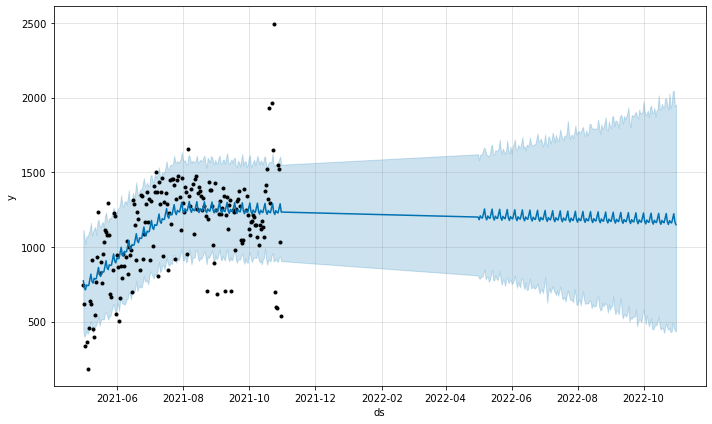

In [54]:
fig1 = m.plot(forecast)

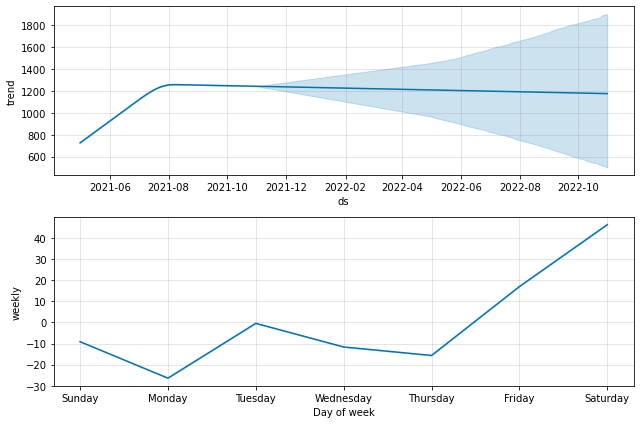

In [55]:
fig2 = m.plot_components(forecast)

In [9]:
n = Prophet()
n.add_country_holidays(country_name='US')
n.fit(test_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.39391


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      62        320.75    0.00236837       79.4293   2.883e-05       0.001      115  LS failed, Hessian reset 
      97       320.963   2.21402e-05       77.0827    3.45e-07       0.001      199  LS failed, Hessian reset 
      99       320.963   9.51253e-06       59.0053           1           1      201   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       320.968   3.86419e-05        86.337   5.319e-07       0.001      306  LS failed, Hessian reset 
     161        320.97   8.39247e-07       72.9675   1.454e-08       0.001      376  LS failed, Hessian reset 
     190        320.97   4.22921e-07       69.7982   5.926e-09       0.001      457  LS failed, Hessian reset 
     199        320.97   1.19239e-08       65.4742      0.2434      0.8378      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  No

In [10]:
future2 = n.make_future_dataframe(periods=365)
future2.tail()
future2 = future2[(future2['ds'].dt.month < 11) & (future2['ds'].dt.month > 4)]

In [11]:
forecast2 = n.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
363,2022-10-27,1231.150854,558.428598,2040.383311
364,2022-10-28,1259.689814,541.004340,2040.433284
365,2022-10-29,1300.366021,588.234368,2078.333037
366,2022-10-30,1241.684188,538.738164,2012.445937
367,2022-10-31,1224.963592,505.724893,2013.292222


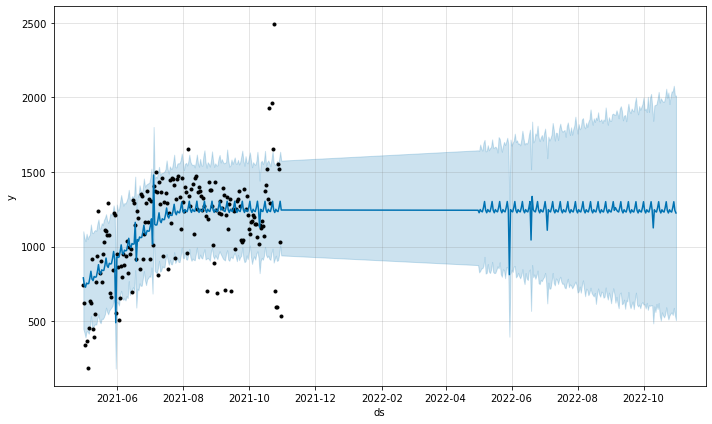

In [12]:
fig2 = n.plot(forecast2)

In [63]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(n, horizon='30 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:prophet:Making 5 forecasts with cutoffs between 2021-08-02 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]


Initial log joint probability = -104.892
Iteration  1. Log joint probability =    92.6138. Improved by 197.506.
Iteration  2. Log joint probability =     123.79. Improved by 31.1763.
Iteration  3. Log joint probability =    138.637. Improved by 14.8468.
Iteration  4. Log joint probability =    140.345. Improved by 1.7085.
Iteration  5. Log joint probability =    140.352. Improved by 0.00642933.
Iteration  6. Log joint probability =    140.372. Improved by 0.0199293.
Iteration  7. Log joint probability =     140.38. Improved by 0.00874144.
Iteration  8. Log joint probability =    140.417. Improved by 0.0360547.
Iteration  9. Log joint probability =    140.461. Improved by 0.0445331.
Iteration 10. Log joint probability =    140.528. Improved by 0.0671619.
Iteration 11. Log joint probability =    140.614. Improved by 0.0857343.
Iteration 12. Log joint probability =    140.686. Improved by 0.0720454.
Iteration 13. Log joint probability =    141.331. Improved by 0.644711.
Iteration 14. Log

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,74877.836476,273.638149,187.245763,0.196359,0.099528,0.156372,0.800000
1,4 days,51037.295231,225.914354,173.263601,0.148407,0.120461,0.132521,0.733333
2,5 days,45271.358046,212.770670,159.842241,0.131546,0.099528,0.118850,0.733333
3,6 days,72617.068853,269.475544,181.163713,0.174026,0.094132,0.140908,0.733333
4,7 days,66604.460738,258.078400,160.504688,0.161946,0.065654,0.127581,0.800000


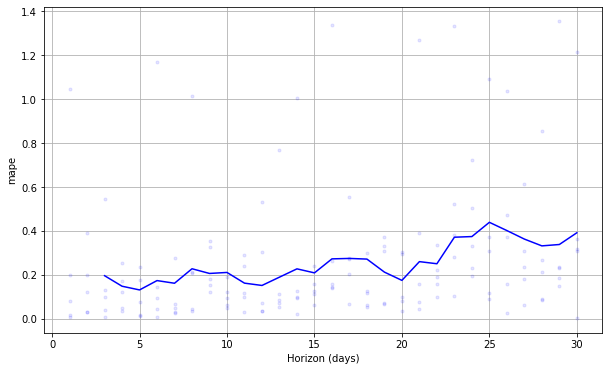

In [64]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
test_df2 = data_import[['Full_Date','value']]
test_df2['Full_Date'] = pd.to_datetime(test_df['Full_Date'])
